# Project Overview

- 현대자동차 리뷰 데이터를 바탕으로 인사이트 도출 및 프로그램 제작

# Data Load

In [57]:
import pandas as pd
df_hyundai = pd.read_csv("./data/Scraped_Car_Review_hyundai.csv", engine='python')

In [58]:
df_hyundai.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0
1,1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0
2,2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0
3,3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0
4,4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0


# Preprocessing

In [59]:
del df_hyundai['Unnamed: 0']

In [60]:
df_hyundai.head(3)

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0


In [61]:
df_hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9361 entries, 0 to 9360
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Date    8440 non-null   object 
 1   Author_Name    8226 non-null   object 
 2   Vehicle_Title  8226 non-null   object 
 3   Review_Title   8226 non-null   object 
 4   Review         8226 non-null   object 
 5   Rating         8012 non-null   float64
dtypes: float64(1), object(5)
memory usage: 438.9+ KB


## null droping
- rating 기준으로 삭제합니다.

In [62]:
df_hyundai['Rating'].isna().sum()

1349

In [63]:
df_hyundai[df_hyundai['Rating']==np.nan]

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating


In [66]:
df_hyundai_dropna = df_hyundai.dropna(subset=['Rating'])

In [68]:
df_hyundai_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 0 to 9360
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Date    8012 non-null   object 
 1   Author_Name    8012 non-null   object 
 2   Vehicle_Title  8012 non-null   object 
 3   Review_Title   8012 non-null   object 
 4   Review         8012 non-null   object 
 5   Rating         8012 non-null   float64
dtypes: float64(1), object(5)
memory usage: 438.2+ KB


In [71]:
df_hyundai_drop = df_hyundai.copy()

In [128]:
for i in df_hyundai_drop['Rating']:
    if i == np.float64(np.nan):
        print(i)

In [122]:
df_hyundai_drop['Rating'].index

RangeIndex(start=0, stop=9361, step=1)

In [83]:
df_hyundai_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9361 entries, 0 to 9360
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Date    8440 non-null   object 
 1   Author_Name    8226 non-null   object 
 2   Vehicle_Title  8226 non-null   object 
 3   Review_Title   8226 non-null   object 
 4   Review         8226 non-null   object 
 5   Rating         8012 non-null   float64
dtypes: float64(1), object(5)
memory usage: 438.9+ KB


In [133]:
df_hyundai_drop = df_hyundai_drop.drop(index=df_hyundai_drop[df_hyundai_drop.Rating.isnull() == True].index)

In [134]:
df_hyundai_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 0 to 9360
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Date    8012 non-null   object 
 1   Author_Name    8012 non-null   object 
 2   Vehicle_Title  8012 non-null   object 
 3   Review_Title   8012 non-null   object 
 4   Review         8012 non-null   object 
 5   Rating         8012 non-null   float64
dtypes: float64(1), object(5)
memory usage: 438.2+ KB


In [135]:
df_hyundai_dropna.describe()

,Rating
count,8012.000000
mean,4.249095
std,0.963797
min,1.000000
25%,4.000000
50%,4.625000
75%,5.000000
max,5.000000


In [137]:
import matplotlib.pyplot as plt

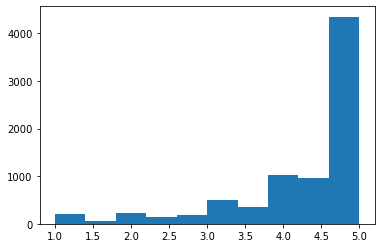

In [139]:
plt.hist(df_hyundai_dropna['Rating'])

In [161]:
df_hyundai_dropna['Rating'].value_counts().head()

5.000    2309
4.875     925
4.000     640
4.750     629
4.625     484
Name: Rating, dtype: int64

In [276]:
df_hyundai_dropna['Rating'].value_counts()[:2.5]

5.000    2309
4.875     925
4.000     640
4.750     629
4.625     484
4.500     363
4.375     311
4.250     281
3.000     268
4.125     213
1.000     171
3.875     168
2.000     165
3.625     131
3.750     127
3.500      90
3.250      79
3.375      78
2.875      70
3.125      66
2.750      65
2.625      57
2.500      57
Name: Rating, dtype: int64

In [294]:
ser_test = df_hyundai_dropna['Rating'].value_counts()[:2.5]

In [163]:
# 별점 5점을 받은 모델 순위 리스트
df_hyundai_dropna[df_hyundai_dropna['Rating'] == 5]['Vehicle_Title'].apply(lambda x : x.split(' ')[2]).value_counts()[:5]

Elantra    472
Sonata     455
Santa      279
Genesis    277
Accent     210
Name: Vehicle_Title, dtype: int64

In [171]:
def top_rating(star):
    return df_hyundai_dropna[df_hyundai_dropna['Rating'] == star]['Vehicle_Title'].apply(lambda x : x.split(' ')[2]).value_counts()[:5]

In [178]:
top_rating(1)

Sonata     45
Elantra    30
Tucson     29
Santa      22
Accent     13
Name: Vehicle_Title, dtype: int64

In [180]:
df_hyundai_dropna.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0


In [183]:
df_hyundai_dropna['Review_Date'].apply(lambda x : x.split(' ')[2])

0       03/28/18
1       05/02/17
2       05/02/17
3       03/27/17
4       01/10/17
          ...   
9356    07/29/08
9357    07/13/08
9358    06/28/08
9359    06/16/08
9360    05/22/08
Name: Review_Date, Length: 8012, dtype: object

In [185]:
df_hyundai_dropna['Review_Time'] = pd.to_datetime(df_hyundai_dropna['Review_Date'].apply(lambda x : x.split(' ')[2]), format="%m/%d/%y")
df_hyundai_dropna.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_Time
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0,2018-03-28
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0,2017-05-02
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0,2017-05-02
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0,2017-03-27
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0,2017-01-10


In [210]:
df_hyundai_dropna['Review_clock'] = df_hyundai_dropna['Review_Date'].apply(lambda x : x.split(' ')[3])
df_hyundai_dropna.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_Time,Review_clock
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0,2018-03-28,20:22
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0,2017-05-02,18:03
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0,2017-05-02,18:03
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0,2017-03-27,14:49
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0,2017-01-10,10:22


In [212]:
df_hyundai_dropna['Review_hour'] = df_hyundai_dropna['Review_clock'].apply(lambda x : x.split(':')[0])
df_hyundai_dropna.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_Time,Review_clock,Review_hour
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0,2018-03-28,20:22,20
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0,2017-05-02,18:03,18
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0,2017-05-02,18:03,18
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0,2017-03-27,14:49,14
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0,2017-01-10,10:22,10


In [217]:
df_hyundai_dropna['Review_hour'] = df_hyundai_dropna['Review_hour'].apply(lambda x : int(x))
df_hyundai_dropna.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_Time,Review_clock,Review_hour
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0,2018-03-28,20:22,20
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0,2017-05-02,18:03,18
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0,2017-05-02,18:03,18
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0,2017-03-27,14:49,14
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0,2017-01-10,10:22,10


In [251]:
df_hyundai_dropna['Review_Date'].apply(lambda x : x.split('(')[1]).unique()

array(['PDT)', 'PST)'], dtype=object)

## visualization by time

In [218]:
import seaborn as sns

In [237]:
df_hyundai_dropna['Rating_int'] = df_hyundai_dropna['Rating'].apply(lambda x: int(x))

In [238]:
df_hyundai_dropna.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Review_Time,Review_clock,Review_hour,Rating_int
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0,2018-03-28,20:22,20,4
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0,2017-05-02,18:03,18,1
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0,2017-05-02,18:03,18,5
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0,2017-03-27,14:49,14,5
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0,2017-01-10,10:22,10,4


<AxesSubplot:xlabel='Rating_int', ylabel='Review_hour'>

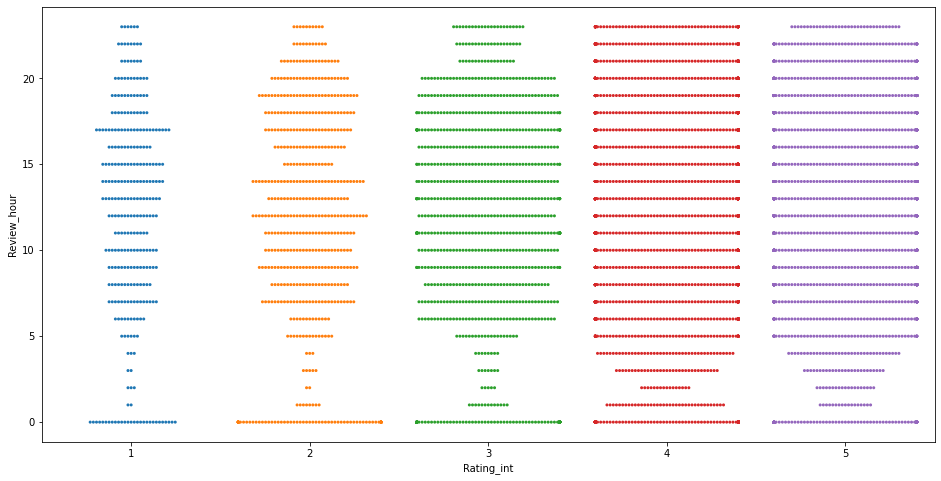

In [252]:
fig = plt.figure(figsize=(16,8))
# plt.xticks([0, 1, 2, 3, 4, 5], rotation=90)
sns.swarmplot(x='Rating_int', y='Review_hour', data=df_hyundai_dropna, size=3)

## by maker

In [201]:
import os

In [205]:
os.getcwd()

'/Users/johanjun/Documents/2021/fc_mobis_4th/data'

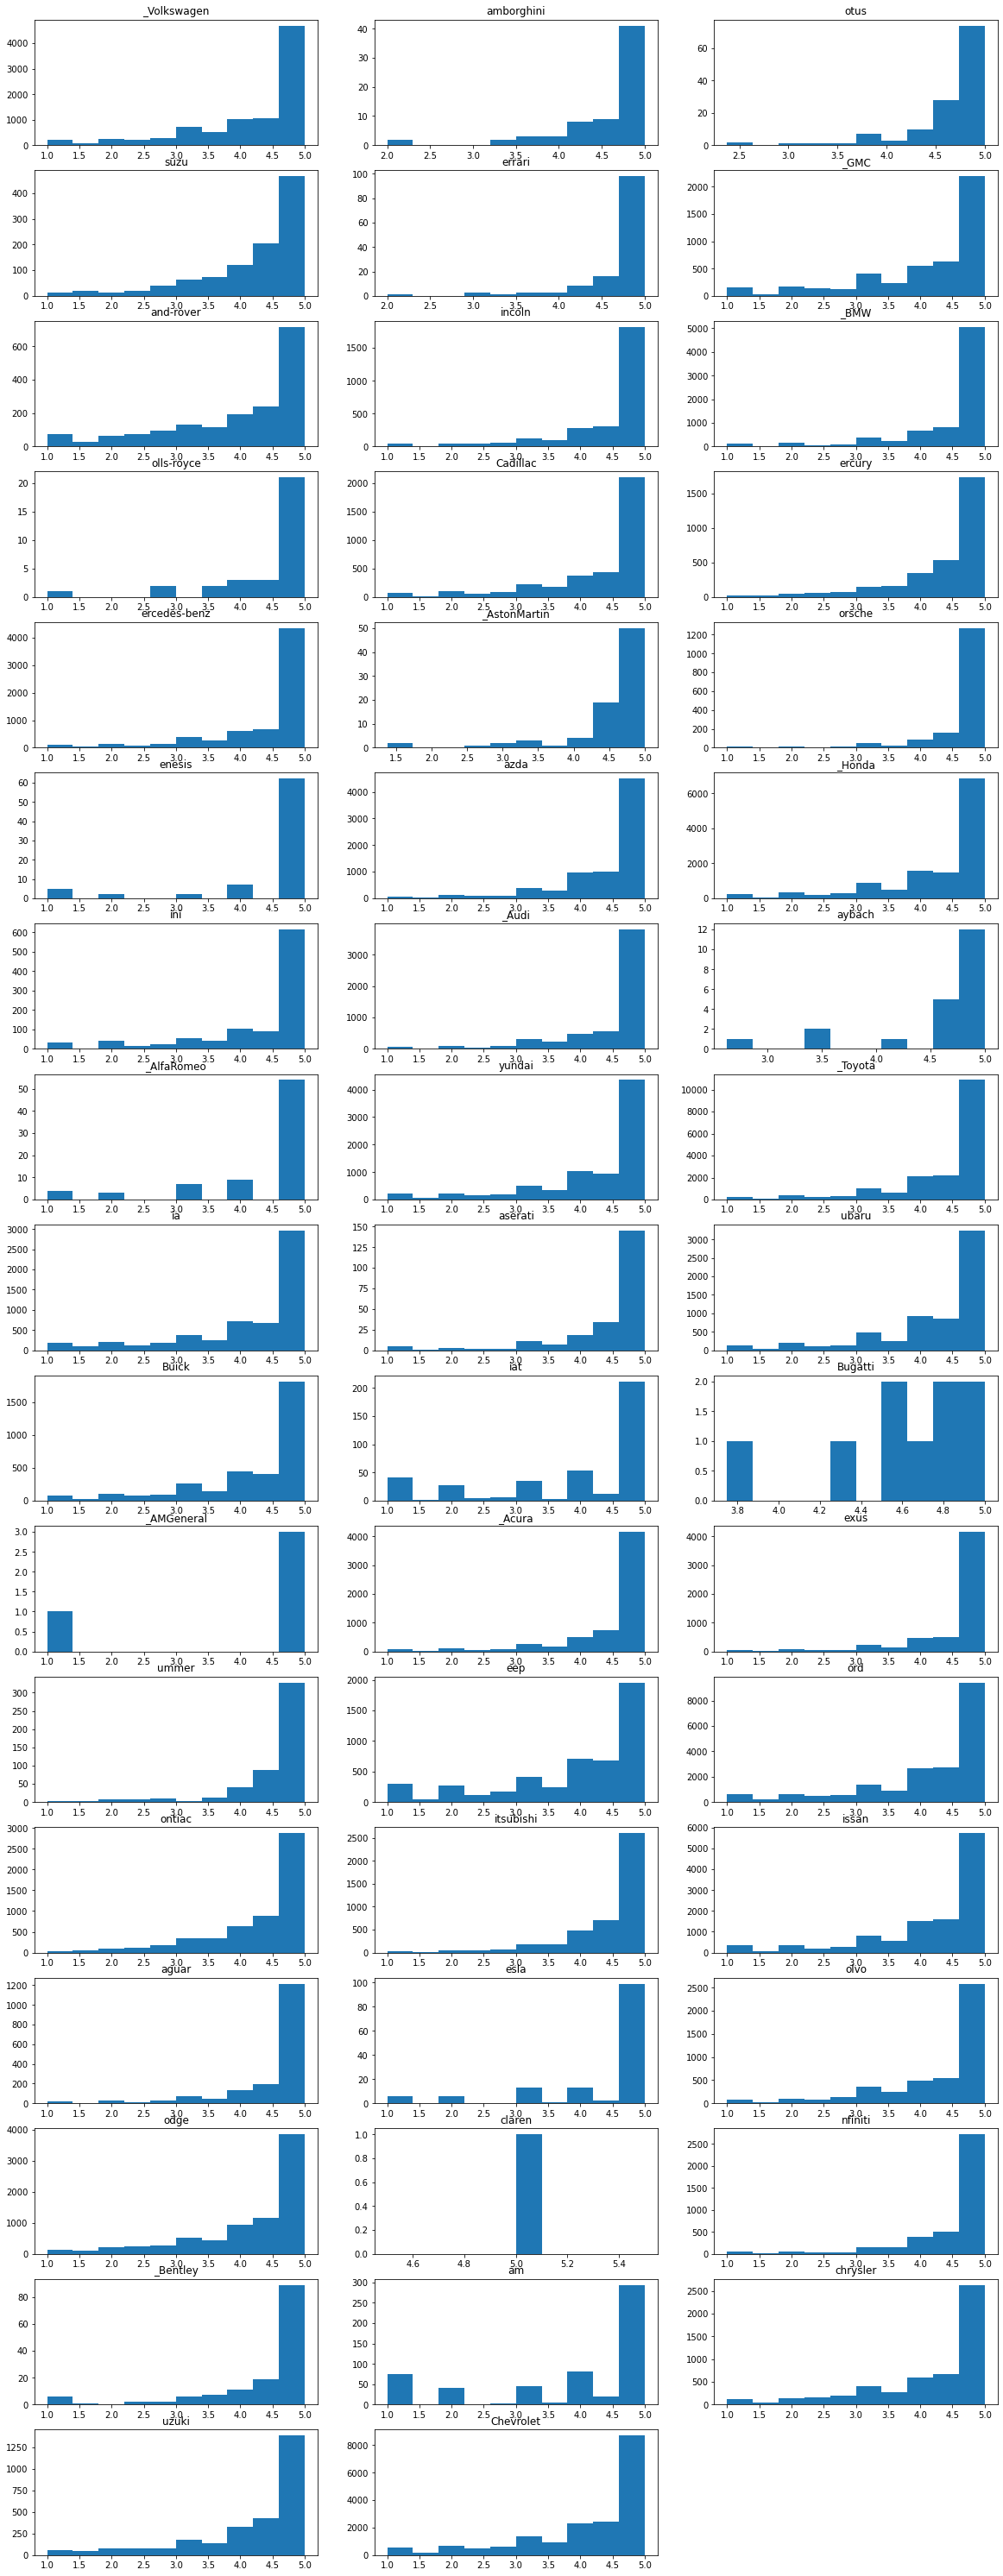

In [206]:
base_path = os.getcwd()+"/data2/"
file_list = os.listdir(base_path)
os.chdir(base_path)
plt.figure(figsize=(20, 160))

for index, file_name in enumerate(file_list):
    if file_name.startswith("."):
        continue
    brand_name = file_name[20:-4]
    plt.subplot(len(file_list), 3, index+1)
    df = pd.read_csv(file_name, engine='python')
    plt.title(brand_name)
    plt.hist(df['Rating'])
plt.show()

In [254]:
df_hyundai.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 03/28/18 20:22 PM (PDT),Kiowa1@gmail.com,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Excellent Value,I bought the 2006 Azera Limited in June of 20...,4.0
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0
4,on 01/10/17 10:22 AM (PST),Nick Casper,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Good value for luxury,We have had our 2006 Azera from nearly new (3...,4.0


In [311]:
li = [3.0, 4.0]

In [316]:
[i for i in df_hyundai['Rating'] if i in li]

TypeError: Cannot index by location index with a non-integer key

In [322]:
for l in li:
    df_hyundai = df_hyundai.drop(index=df_hyundai[df_hyundai['Rating'] == l].index)

In [323]:
df_hyundai.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
1,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Don't even waste your time looking much less b...,Electrical nightmare. Dealer cost for repair...,1.0
2,on 05/02/17 18:03 PM (PDT),SiGung,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Great car,"Great car, great ride, would have better mile...",5.0
3,on 03/27/17 14:49 PM (PDT),Kevin Gibson,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Best car ever,I absolutly love my Azera. The performance is...,5.0
5,on 09/19/16 21:58 PM (PDT),Michael,2006 Hyundai Azera Sedan SE 4dr Sedan (3.8L 6c...,Exactly what a car should be,You really need to drive one the 2006-2011 Az...,5.0
6,on 05/17/16 12:00 PM (PDT),Peter Evangelista,2006 Hyundai Azera Sedan Limited 4dr Sedan (3....,Honey Hyundia,This one of the best cars that I have ever ow...,5.0
